In [1]:
%%capture
%run TFG_basic_functions.ipynb

#from basic_functions import *

import scipy.io # import .mat
import time
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import seaborn as sns


from skfeature.function.statistical_based import f_score
from skfeature.function.information_theoretical_based import MRMR

from sklearn.model_selection import cross_validate
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import train_test_split

from sklearn.feature_selection import RFE

from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC

from datetime import timedelta

## Load Dataset

In [2]:
# Load dataset ALLAML
ds = scipy.io.loadmat("ALLAML.mat")
# Features -> X
X = ds['X']
# Class labels -> y
y = ds['Y'][:,0]
# Shape of the data array
n_samples, n_features = np.shape(X)
# Shape of the class labels
n_labels = np.shape(y)

## Scoring & FS methods

In [3]:
# total features to select
num_fea = n_features
# Scoring
scoring=['accuracy','precision','recall']
# fs methods
fs_method = ['f_score','mrmr','svm_f','svm_b']

## ML methods

In [4]:
# Model
clf_KNN = KNeighborsClassifier(n_neighbors=3)
clf_DTC = DecisionTreeClassifier()
clf_SVC = SVC()
models = [clf_KNN,clf_DTC,clf_SVC]
# Scoring
scoring=['accuracy','precision','recall']

## CV

In [5]:
# cross validate method
skf = StratifiedKFold(n_splits=5,shuffle=True,random_state=32)

### Filter - f-score

In [6]:
startTime = time.time()
idx_f_score = select_FS_method(fs_method[0],X,y,num_fea)
endTime = time.time()
timeUsed = timedelta(seconds=endTime-startTime)
print('- Time used in FS f_score method: ' + str(timeUsed))

- Time used in FS f_score method: 0:00:00.014290


In [7]:
knnResult,dtcResult,svcResult,cMatrix = model_result2(X,y,skf,models,500,scoring,idx_f_score)

         - Time used in KNeighbors 0:00:24.583281
         - Time used in DecisionTr 0:00:13.321155
         - Time used in SVC(C=1.0, 0:00:16.726166
------- Time used in FOLD 0:       0:00:55.007593
         - Time used in KNeighbors 0:00:22.711991
         - Time used in DecisionTr 0:00:13.006940
         - Time used in SVC(C=1.0, 0:00:17.070154
------- Time used in FOLD 1:       0:00:53.168066
         - Time used in KNeighbors 0:00:23.076941
         - Time used in DecisionTr 0:00:12.953666
         - Time used in SVC(C=1.0, 0:00:17.336519
------- Time used in FOLD 2:       0:00:53.790621
         - Time used in KNeighbors 0:00:23.610147
         - Time used in DecisionTr 0:00:12.725068
         - Time used in SVC(C=1.0, 0:00:18.336618
------- Time used in FOLD 3:       0:00:55.072847
         - Time used in KNeighbors 0:00:26.936946
         - Time used in DecisionTr 0:00:14.427194
         - Time used in SVC(C=1.0, 0:00:21.974776
------- Time used in FOLD 4:       0:01:03.959512


In [8]:
fmyKNN = formatArray(knnResult)
fmyDTC = formatArray(dtcResult)
fmySVC = formatArray(svcResult)

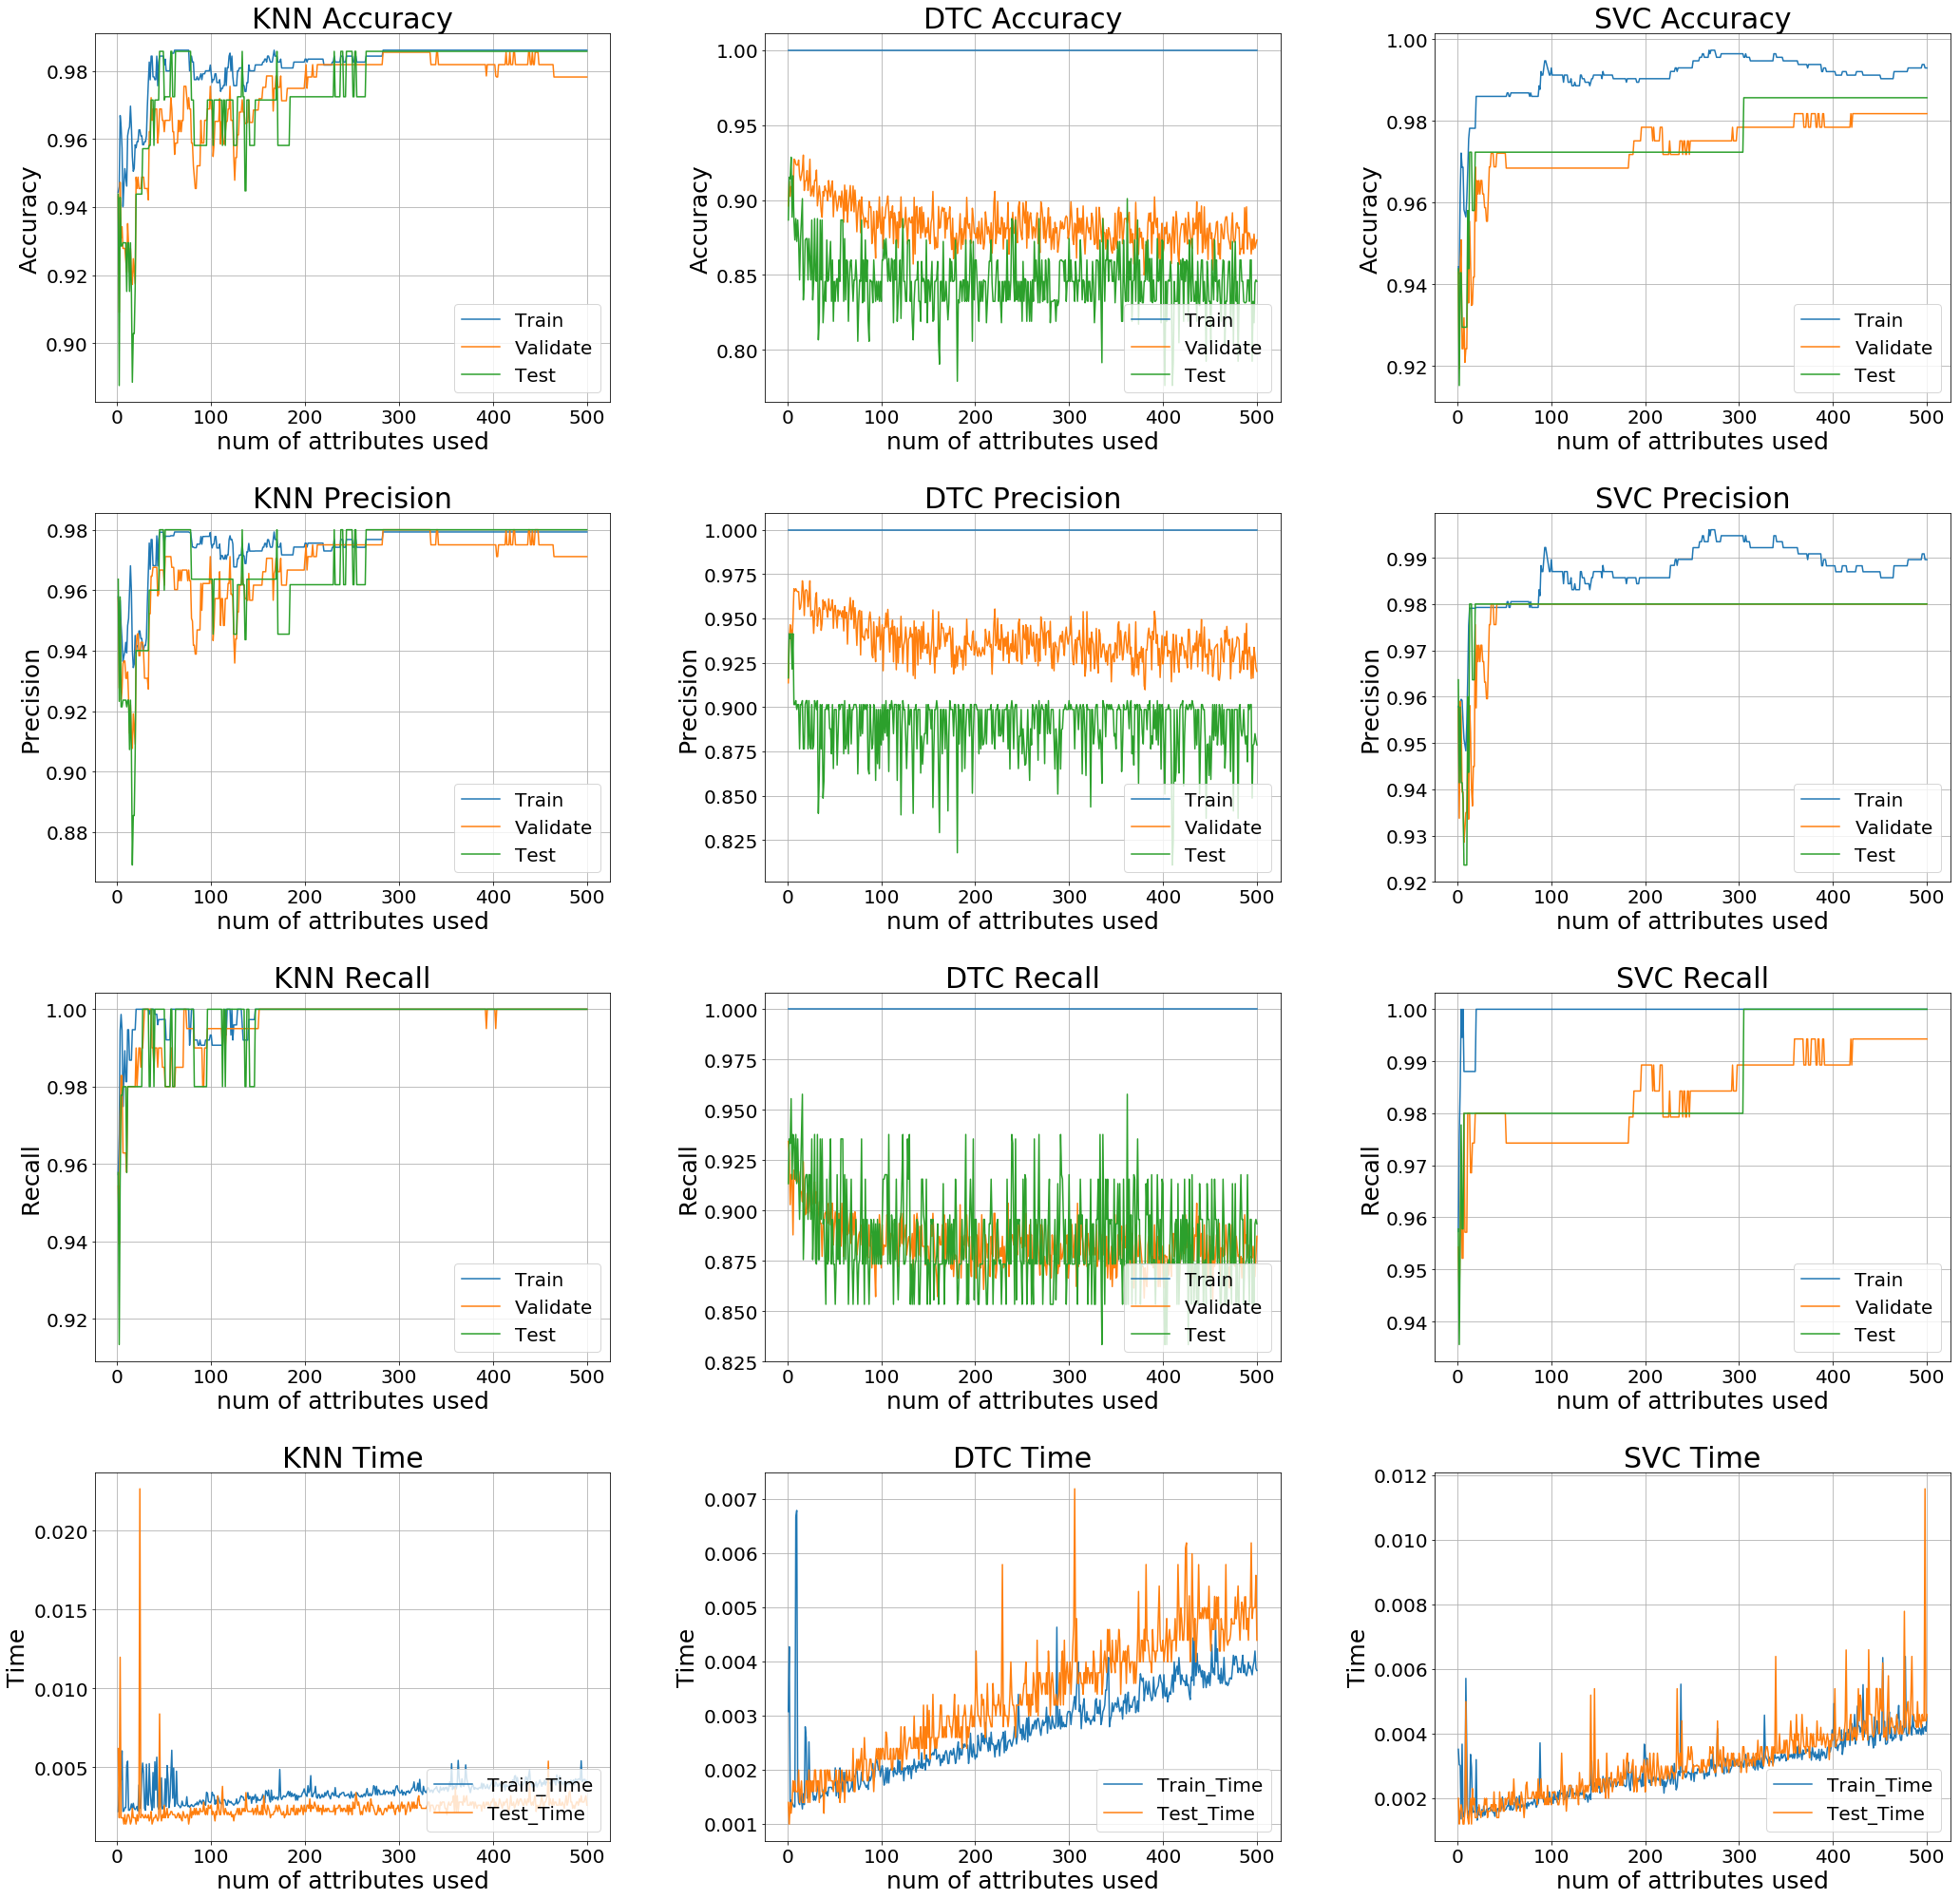

In [9]:
plotModel2(fmyKNN,fmyDTC,fmySVC,(35,35),0.3,0.3,20)

In [10]:
printTotalBestResult(fmyKNN,fmyDTC,fmySVC)

KNN
- Max Accuracy:   0.9857142857142858 using: 45 attributes.
- Max Precission: 0.9800000000000001 using: 45 attributes.
- Max Recall:     1.0 using: 27 attributes.

DTC
- Max Accuracy:   0.9285714285714286 using: 4 attributes.
- Max Precission: 0.9414141414141415 using: 2 attributes.
- Max Recall:     0.9577777777777777 using: 16 attributes.

SVC
- Max Accuracy:   0.9857142857142858 using: 305 attributes.
- Max Precission: 0.9800000000000001 using: 13 attributes.
- Max Recall:     1.0 using: 305 attributes.


### Filter - mRMR

In [11]:
# mRMR with 500 features
num_fea_mrmr = 500
startTime = time.time()
idx_mrmr = select_FS_method(fs_method[1],X,y,num_fea_mrmr)
endTime = time.time()
timeUsed = timedelta(seconds=endTime-startTime)
print('- Time used in FS f_score method: ' + str(timeUsed))

- Time used in FS f_score method: 0:35:40.588381


In [12]:
knnResult,dtcResult,svcResult,cMatrix = model_result2(X,y,skf,models,num_fea_mrmr,scoring,idx_mrmr)

         - Time used in KNeighbors 0:00:23.763180
         - Time used in DecisionTr 0:00:16.957090
         - Time used in SVC(C=1.0, 0:00:20.741971
------- Time used in FOLD 0:       0:01:01.882118
         - Time used in KNeighbors 0:00:25.292075
         - Time used in DecisionTr 0:00:18.134435
         - Time used in SVC(C=1.0, 0:00:22.468296
------- Time used in FOLD 1:       0:01:06.357625
         - Time used in KNeighbors 0:00:25.978263
         - Time used in DecisionTr 0:00:16.433923
         - Time used in SVC(C=1.0, 0:00:19.489078
------- Time used in FOLD 2:       0:01:02.347073
         - Time used in KNeighbors 0:00:23.213535
         - Time used in DecisionTr 0:00:16.557642
         - Time used in SVC(C=1.0, 0:00:19.509302
------- Time used in FOLD 3:       0:00:59.734125
         - Time used in KNeighbors 0:00:23.062670
         - Time used in DecisionTr 0:00:15.663587
         - Time used in SVC(C=1.0, 0:00:19.308607
------- Time used in FOLD 4:       0:00:58.387920


In [13]:
mmyKNN = formatArray(knnResult)
mmyDTC = formatArray(dtcResult)
mmySVC = formatArray(svcResult)

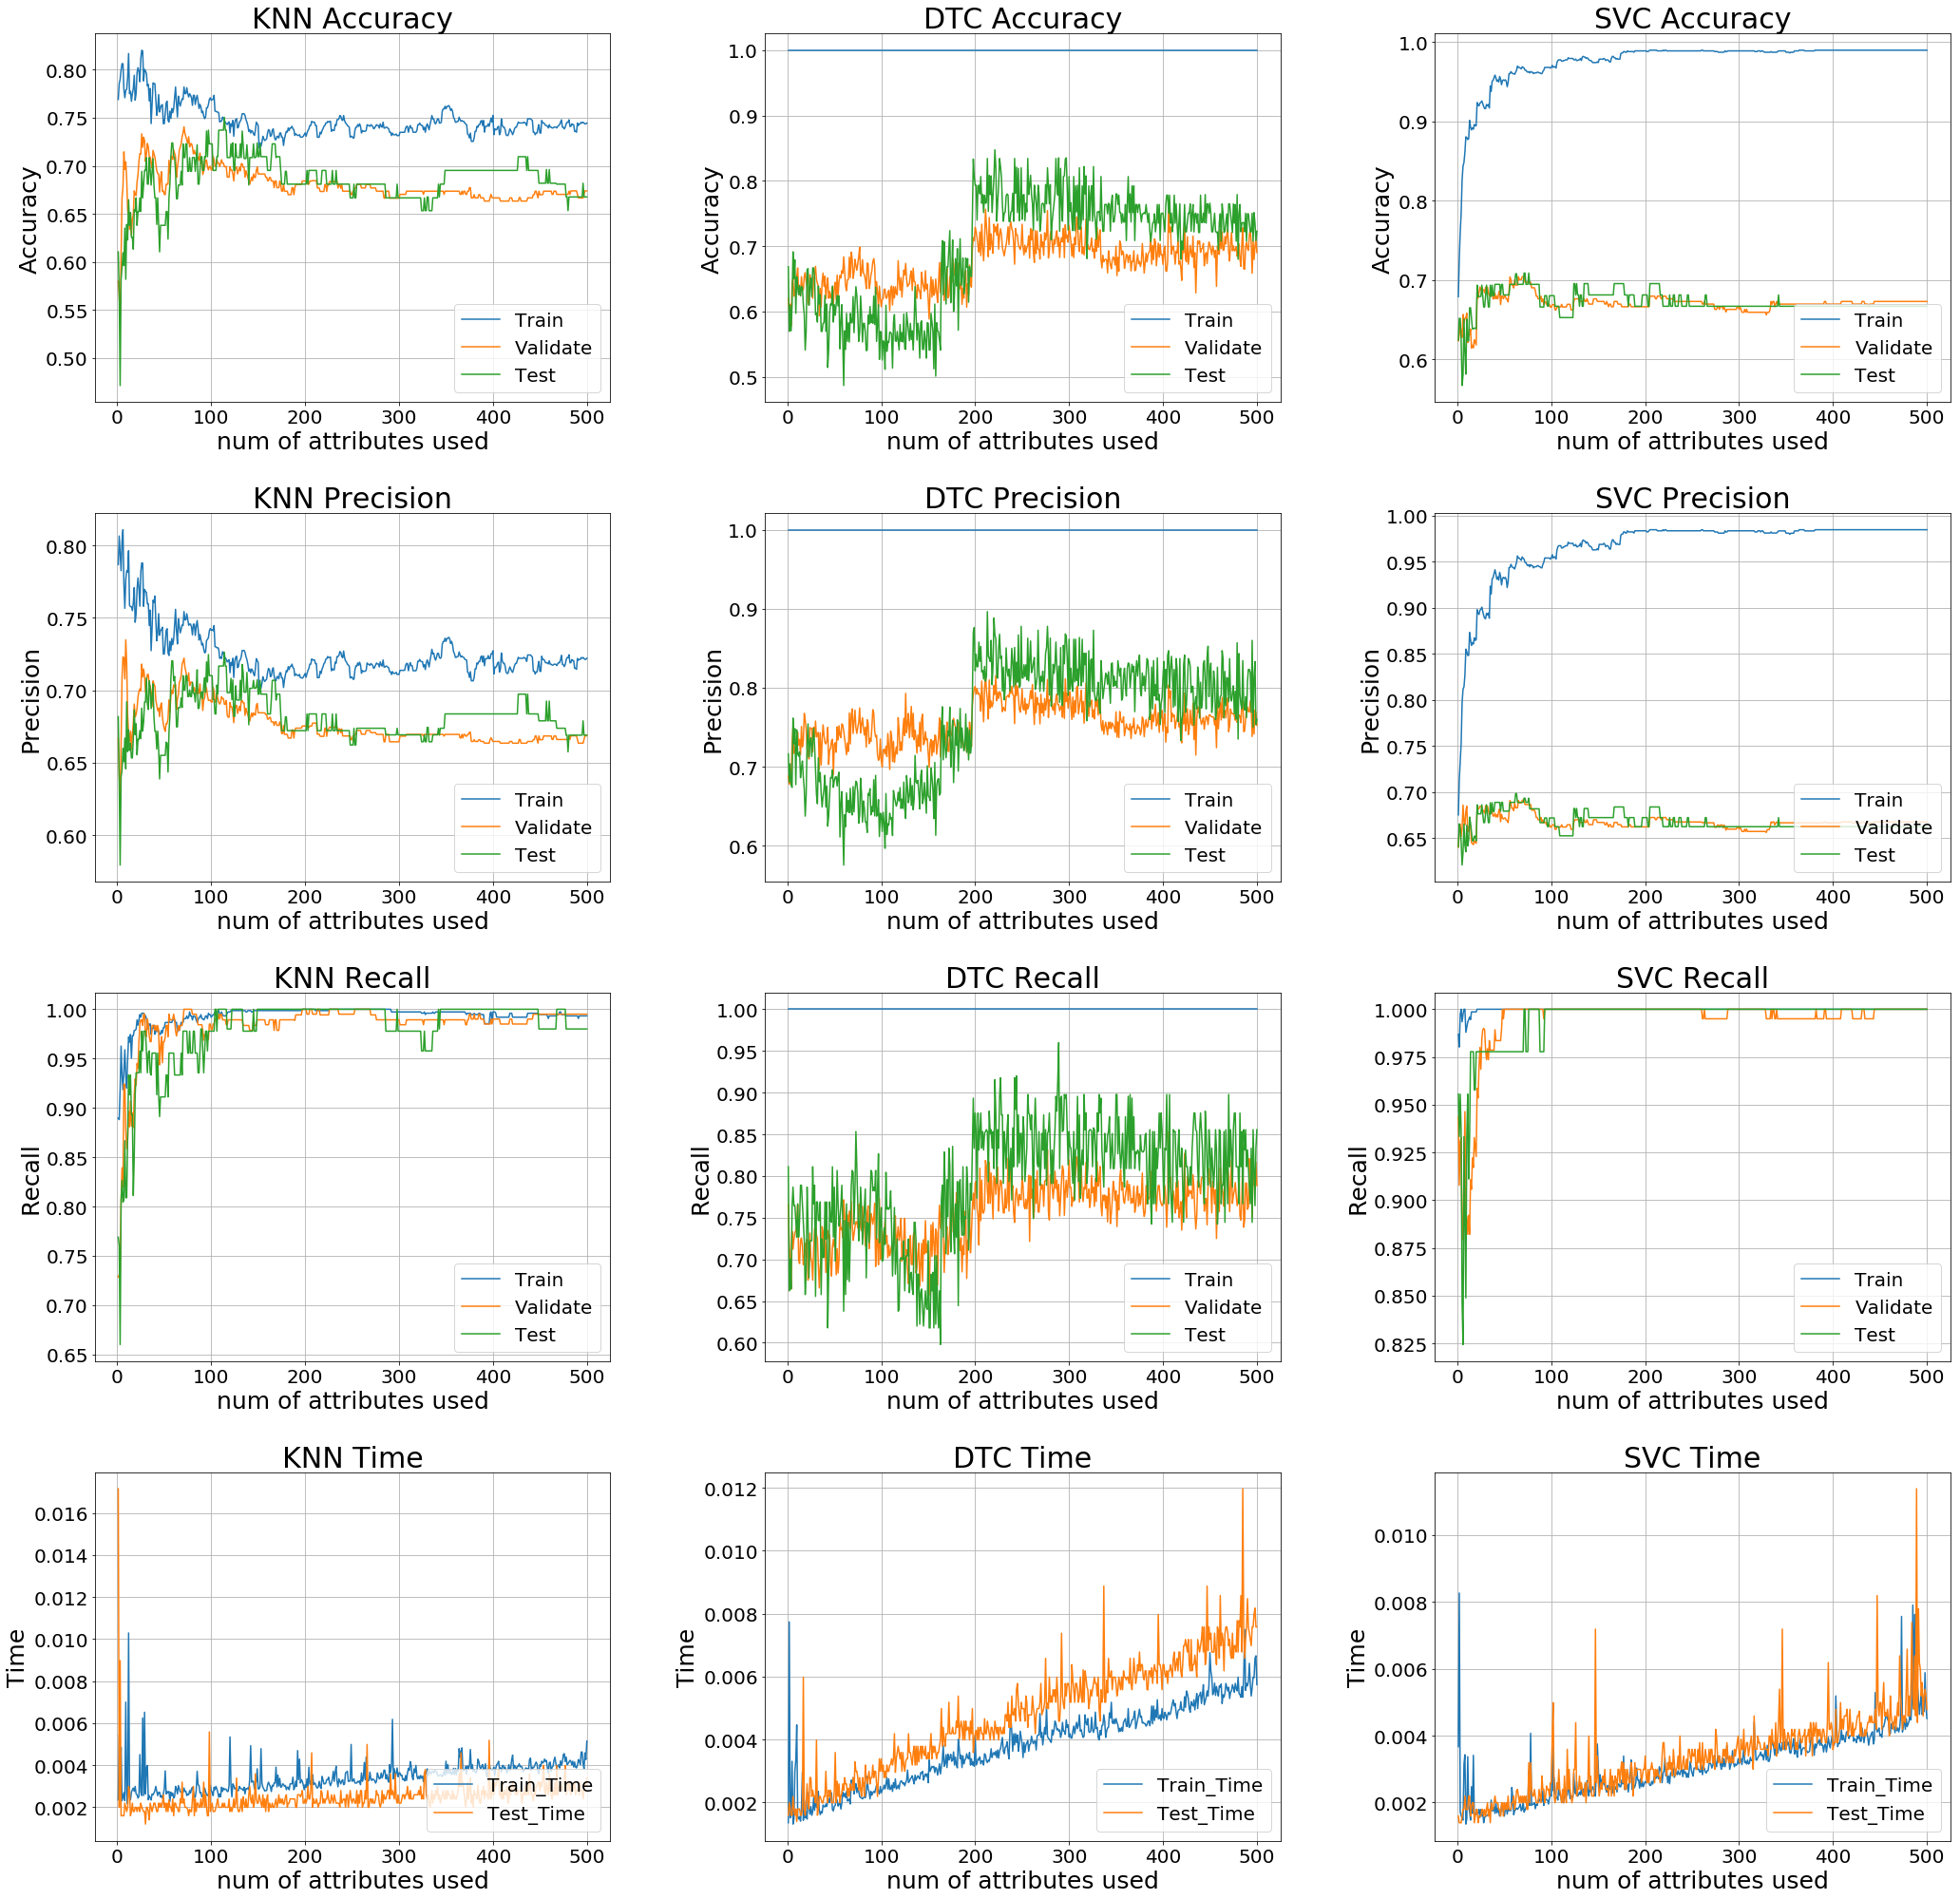

In [14]:
plotModel2(mmyKNN,mmyDTC,mmySVC,(35,35),0.3,0.3,20)

In [15]:
printTotalBestResult(mmyKNN,mmyDTC,mmySVC)

KNN
- Max Accuracy:   0.7504761904761905 using: 114 attributes.
- Max Precission: 0.7262737262737262 using: 114 attributes.
- Max Recall:     1.0 using: 104 attributes.

DTC
- Max Accuracy:   0.8476190476190476 using: 221 attributes.
- Max Precission: 0.8964141414141414 using: 213 attributes.
- Max Recall:     0.96 using: 289 attributes.

SVC
- Max Accuracy:   0.7085714285714285 using: 71 attributes.
- Max Precission: 0.6982017982017982 using: 62 attributes.
- Max Recall:     1.0 using: 71 attributes.


## Hybrid method

In [16]:
idxAND = []
idxXOR = []
idxXOR_f = []
idxXOR_m = []
select_feat = 2500
for i in idx_f_score[:select_feat]:
    if i in idx_mrmr:
        idxAND.append(i)
len(idxAND)

103

In [17]:
for i in idx_f_score[:select_feat]:
    if i not in idxAND:
        idxXOR_f.append(i)
for i in idx_mrmr[:select_feat]:
    if i not in idxAND:
        idxXOR_m.append(i)
print(str(len(idxXOR_f)))
print(str(len(idxXOR_m)))

2397
397


In [18]:
aux = 0
while len(idxXOR) < len(idxAND):
    idxXOR.append(idxXOR_f[aux])
    idxXOR.append(idxXOR_m[aux])
    aux += 1
len(idxXOR)

104

### SVC_backward (AND)

In [19]:
def testBackward(model,X,y,idx,models,limite):
    num_feat = len(idx)
    parar = False
    while parar==False:
        idx_test,result_test = selectBestBackward2(num_feat,model,X,y,idx,models,limite)
        if result_test >= limite:
            limite = result_test
            num_feat = len(idx_test)
            idx = idx_test
            best_idx = idx_test
            best_result = result_test
        else:
            parar = True
    return best_idx,best_result


In [20]:
test1_idx,test1_result = testBackward(clf_SVC,X,y,idxAND,models,0.90)

- Time used in SBS iteration 0: 0:00:00.002992
103
- Time used in SBS iteration 0: 0:00:00.002992
103
- Time used in SBS iteration 1: 0:00:00.569006
102
- Time used in SBS iteration 2: 0:00:02.051414
101
- Time used in SBS iteration 0: 0:00:00.002991
101
- Time used in SBS iteration 1: 0:00:00.879558
100
- Time used in SBS iteration 2: 0:00:02.178695
99
- Time used in SBS iteration 3: 0:00:00.693595
98
- Time used in SBS iteration 0: 0:00:00.003989
98
- Time used in SBS iteration 1: 0:00:00.575463
97
- Time used in SBS iteration 2: 0:00:01.053351
96
- Time used in SBS iteration 3: 0:00:00.835779
95
- Time used in SBS iteration 4: 0:00:01.022786
94
- Time used in SBS iteration 5: 0:00:01.283091
93
- Time used in SBS iteration 6: 0:00:01.342439
92
- Time used in SBS iteration 7: 0:00:01.693946
91
- Time used in SBS iteration 8: 0:00:01.683861
90
- Time used in SBS iteration 9: 0:00:01.890318
89
- Time used in SBS iteration 10: 0:00:02.023547
88
- Time used in SBS iteration 11: 0:00:02.39

- AND: Best result

In [21]:
print(len(test1_idx))
print(str(test1_result))

34
0.959047619047619


In [22]:
knnResult,dtcResult,svcResult,cMatrix = model_result2(X,y,skf,models,len(test1_idx),scoring,test1_idx)

         - Time used in KNeighbors 0:00:01.853401
         - Time used in DecisionTr 0:00:00.886151
         - Time used in SVC(C=1.0, 0:00:00.774268
------- Time used in FOLD 0:       0:00:03.939724
         - Time used in KNeighbors 0:00:01.171881
         - Time used in DecisionTr 0:00:00.707111
         - Time used in SVC(C=1.0, 0:00:00.871207
------- Time used in FOLD 1:       0:00:03.159611
         - Time used in KNeighbors 0:00:01.139302
         - Time used in DecisionTr 0:00:00.824796
         - Time used in SVC(C=1.0, 0:00:00.807840
------- Time used in FOLD 2:       0:00:03.214788
         - Time used in KNeighbors 0:00:01.144955
         - Time used in DecisionTr 0:00:00.760986
         - Time used in SVC(C=1.0, 0:00:00.811785
------- Time used in FOLD 3:       0:00:03.121357
         - Time used in KNeighbors 0:00:01.229854
         - Time used in DecisionTr 0:00:00.731839
         - Time used in SVC(C=1.0, 0:00:00.862695
------- Time used in FOLD 4:       0:00:03.292153


In [23]:
bestmyKNN = formatArray(knnResult)
bestmyDTC = formatArray(dtcResult)
bestmySVC = formatArray(svcResult)

In [25]:
printTotalBestResult(bestmyKNN,bestmyDTC,bestmySVC)

KNN
- Max Accuracy:   0.9323809523809524 using: 34 attributes.
- Max Precission: 0.9266666666666665 using: 33 attributes.
- Max Recall:     1.0 using: 16 attributes.

DTC
- Max Accuracy:   0.8361904761904763 using: 28 attributes.
- Max Precission: 0.8941919191919192 using: 25 attributes.
- Max Recall:     0.8800000000000001 using: 28 attributes.

SVC
- Max Accuracy:   0.917142857142857 using: 16 attributes.
- Max Precission: 0.9103030303030304 using: 4 attributes.
- Max Recall:     0.9800000000000001 using: 2 attributes.


### SVC_forward (XOR)

In [26]:
def testForward(model,X,y,idx,models,limite):
    num_feat=len(idx)
    parar = False
    i = 0
    while parar==False and i<120:
        aux = []
        i+=1
        idx_test,result_test = selectBestForward2(num_feat,model,X,y,idx,models,limite)
        if result_test >= limite:
            limite = result_test
            for i in idx:
                if i not in idx_test:
                    aux.append(i)
            idx = aux
            num_feat = len(idx)
            best_idx = idx_test
            best_result = result_test
        else:
            parar = True
    return best_idx,best_result

- XOR: Best result

In [27]:
test2_idx,test2_result = testForward(clf_SVC,X,y,idxXOR,models,0.90)

- Time used in SFS iteration 1: 0:00:00.080785
1


In [28]:
print(len(test2_idx))
print(str(test2_result))

1
0.9438095238095239


In [29]:
test_idx = test2_idx + test1_idx

In [30]:
knnResult,dtcResult,svcResult,cMatrix = model_result2(X,y,skf,models,len(test_idx),scoring,test_idx)

         - Time used in KNeighbors 0:00:02.575923
         - Time used in DecisionTr 0:00:02.308988
         - Time used in SVC(C=1.0, 0:00:00.765953
------- Time used in FOLD 0:       0:00:06.033621
         - Time used in KNeighbors 0:00:01.147757
         - Time used in DecisionTr 0:00:00.732562
         - Time used in SVC(C=1.0, 0:00:00.849181
------- Time used in FOLD 1:       0:00:03.138407
         - Time used in KNeighbors 0:00:01.232465
         - Time used in DecisionTr 0:00:00.753509
         - Time used in SVC(C=1.0, 0:00:00.831780
------- Time used in FOLD 2:       0:00:03.196775
         - Time used in KNeighbors 0:00:01.326962
         - Time used in DecisionTr 0:00:00.755980
         - Time used in SVC(C=1.0, 0:00:00.799894
------- Time used in FOLD 3:       0:00:03.287871
         - Time used in KNeighbors 0:00:01.272613
         - Time used in DecisionTr 0:00:00.745009
         - Time used in SVC(C=1.0, 0:00:00.848202
------- Time used in FOLD 4:       0:00:03.287663


In [31]:
abestmyKNN = formatArray(knnResult)
abestmyDTC = formatArray(dtcResult)
abestmySVC = formatArray(svcResult)

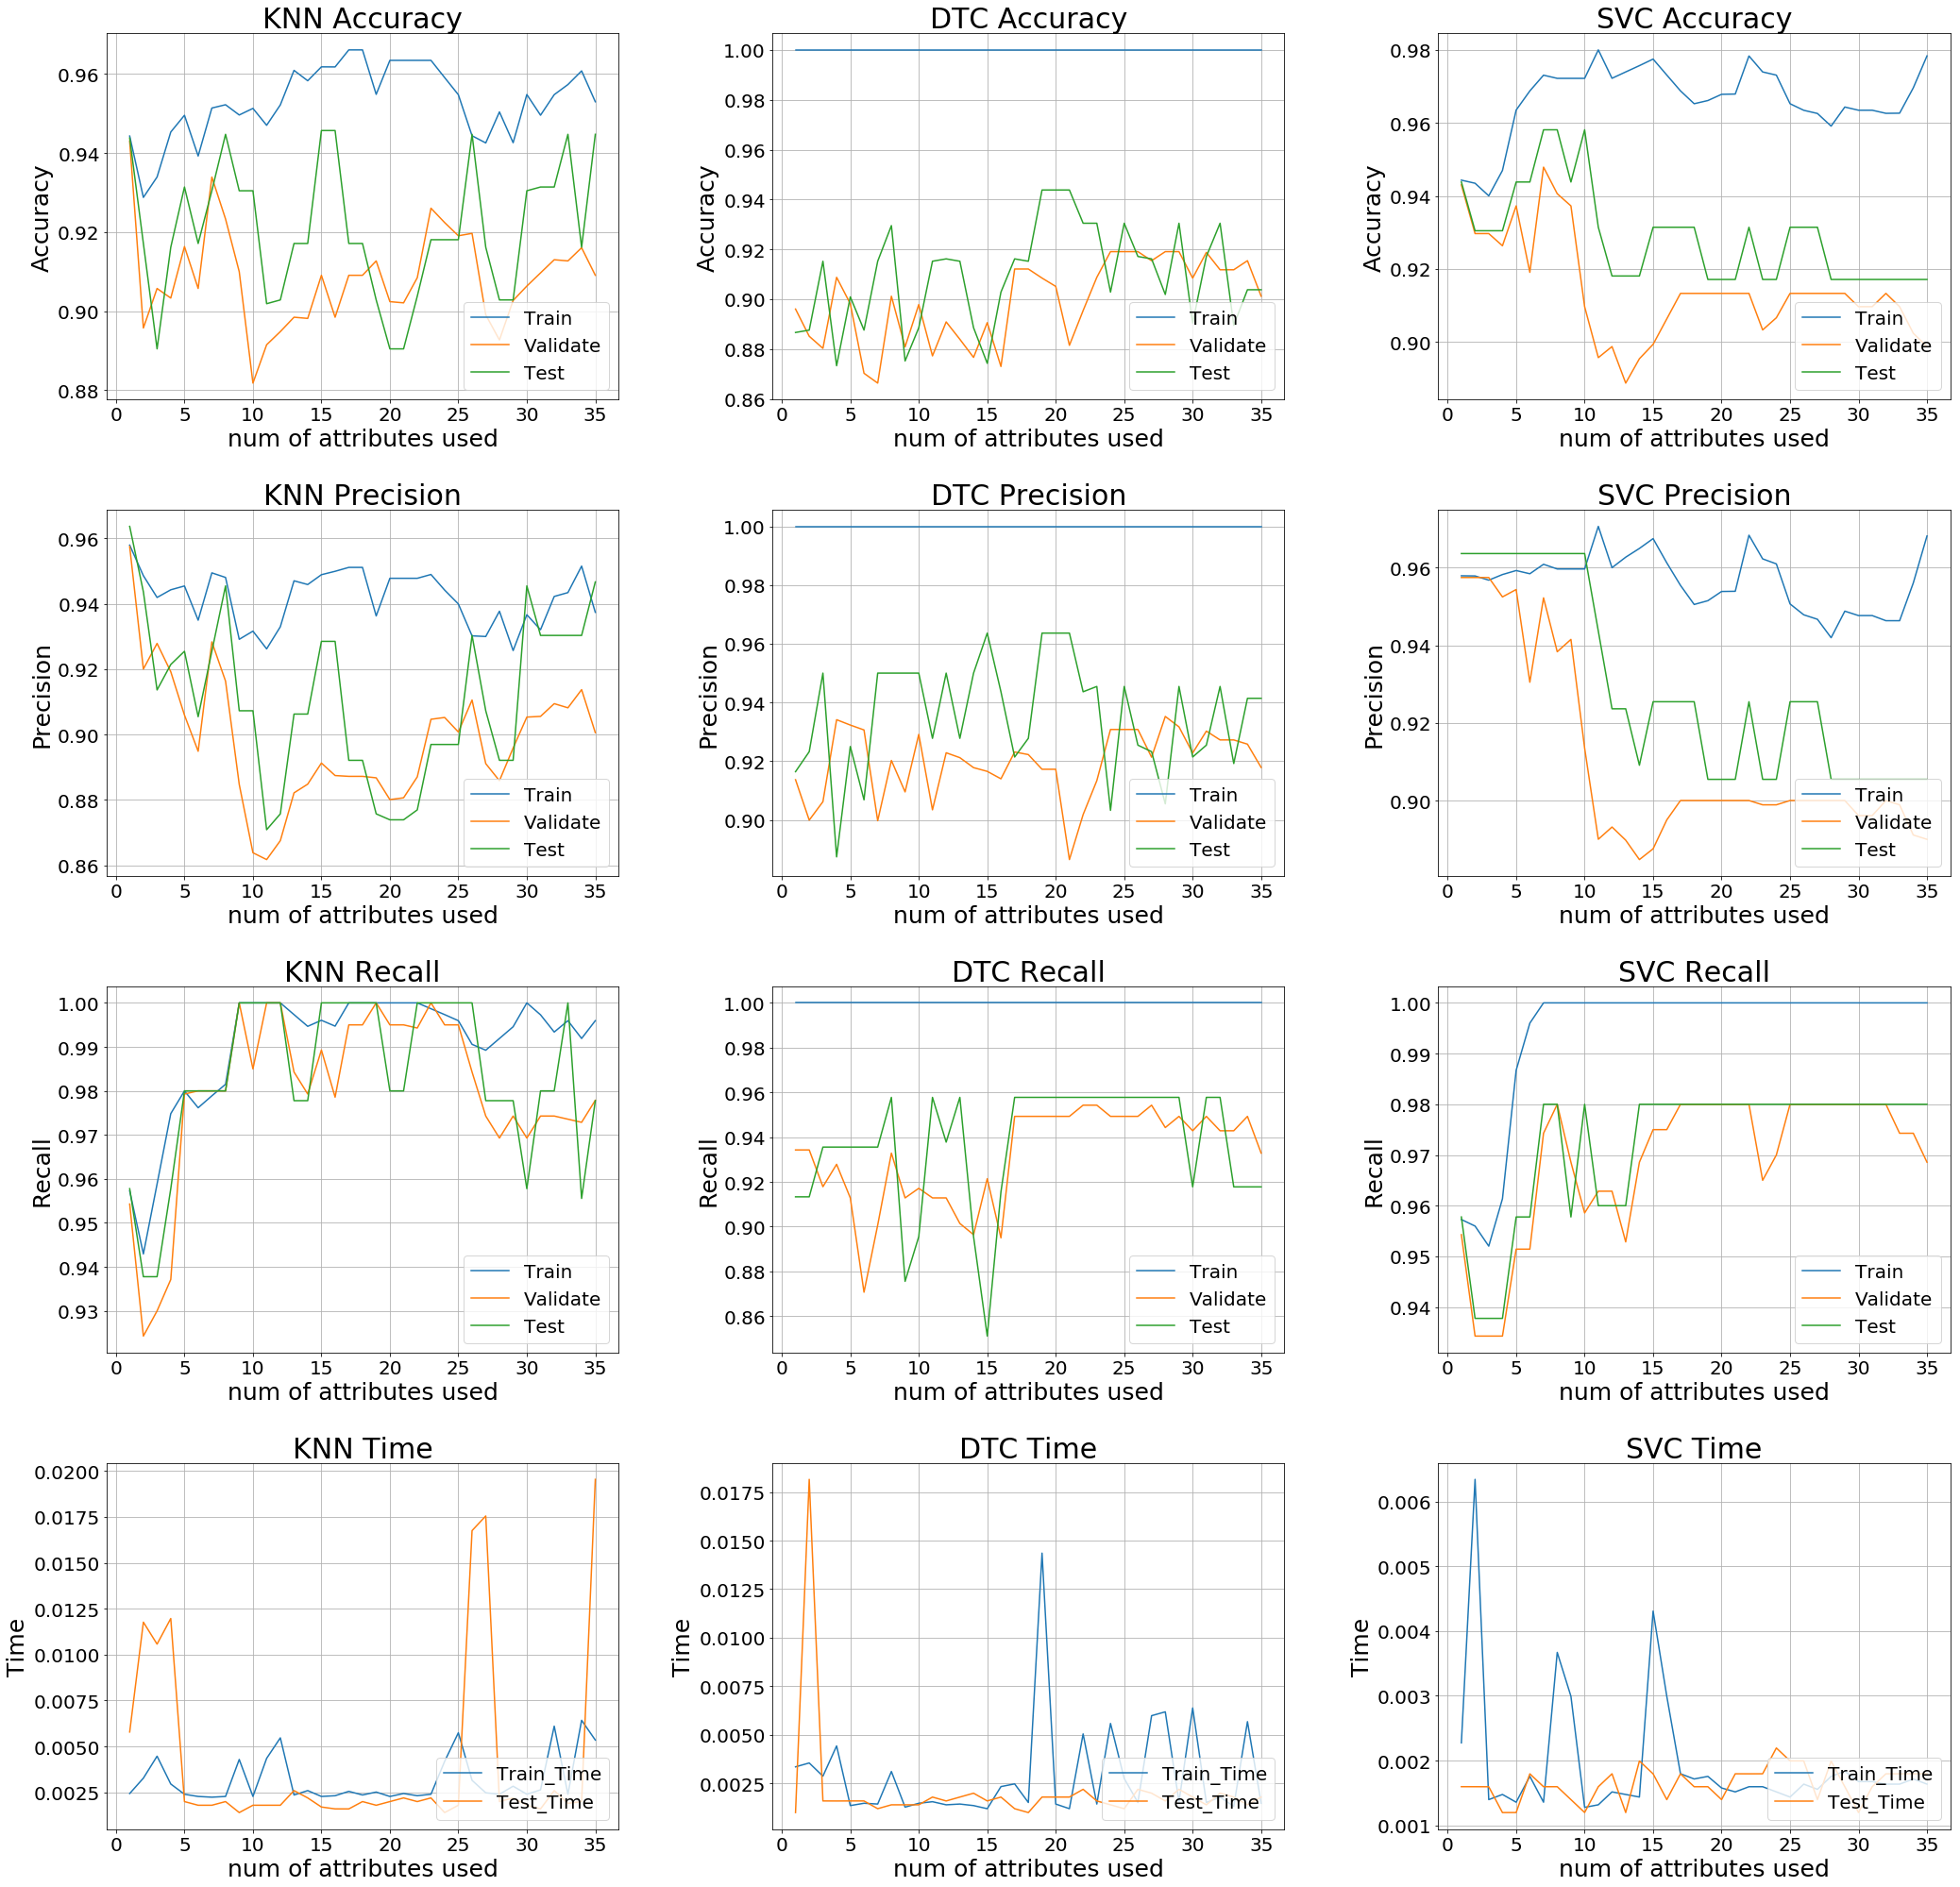

In [32]:
plotModel2(abestmyKNN,abestmyDTC,abestmySVC,(35,35),0.3,0.3,20)

In [33]:
printTotalBestResult(abestmyKNN,abestmyDTC,abestmySVC)

KNN
- Max Accuracy:   0.9457142857142857 using: 15 attributes.
- Max Precission: 0.9636363636363636 using: 1 attributes.
- Max Recall:     1.0 using: 9 attributes.

DTC
- Max Accuracy:   0.9438095238095239 using: 19 attributes.
- Max Precission: 0.9636363636363636 using: 15 attributes.
- Max Recall:     0.9577777777777777 using: 8 attributes.

SVC
- Max Accuracy:   0.9580952380952381 using: 7 attributes.
- Max Precission: 0.9636363636363636 using: 1 attributes.
- Max Recall:     0.9800000000000001 using: 7 attributes.


- XOR: Best result 2

In [34]:
test3_idx,test3_result = testForward(clf_SVC,X,y,idxXOR,models,test2_result)

- Time used in SFS iteration 1: 0:00:00.080784
1
- Time used in SFS iteration 2: 0:00:00.144121
2


### Combine AND & XOR

In [88]:
r_test_idx = test1_idx + test3_idx
print(len(test_idx))
print(len(r_test_idx))

36
36


In [40]:
knnResult,dtcResult,svcResult,cMatrix = model_result2(X,y,skf,models,len(r_test_idx),scoring,r_test_idx)

         - Time used in KNeighbors 0:00:02.734435
         - Time used in DecisionTr 0:00:00.795395
         - Time used in SVC(C=1.0, 0:00:00.875004
------- Time used in FOLD 0:       0:00:04.770568
         - Time used in KNeighbors 0:00:01.181353
         - Time used in DecisionTr 0:00:00.733043
         - Time used in SVC(C=1.0, 0:00:00.858706
------- Time used in FOLD 1:       0:00:03.179521
         - Time used in KNeighbors 0:00:01.276098
         - Time used in DecisionTr 0:00:00.754297
         - Time used in SVC(C=1.0, 0:00:00.873665
------- Time used in FOLD 2:       0:00:03.292055
         - Time used in KNeighbors 0:00:01.248572
         - Time used in DecisionTr 0:00:00.747018
         - Time used in SVC(C=1.0, 0:00:00.861711
------- Time used in FOLD 3:       0:00:03.274787
         - Time used in KNeighbors 0:00:01.295540
         - Time used in DecisionTr 0:00:00.794397
         - Time used in SVC(C=1.0, 0:00:00.843899
------- Time used in FOLD 4:       0:00:03.323919


In [41]:
rbestmyKNN = formatArray(knnResult)
rbestmyDTC = formatArray(dtcResult)
rbestmySVC = formatArray(svcResult)

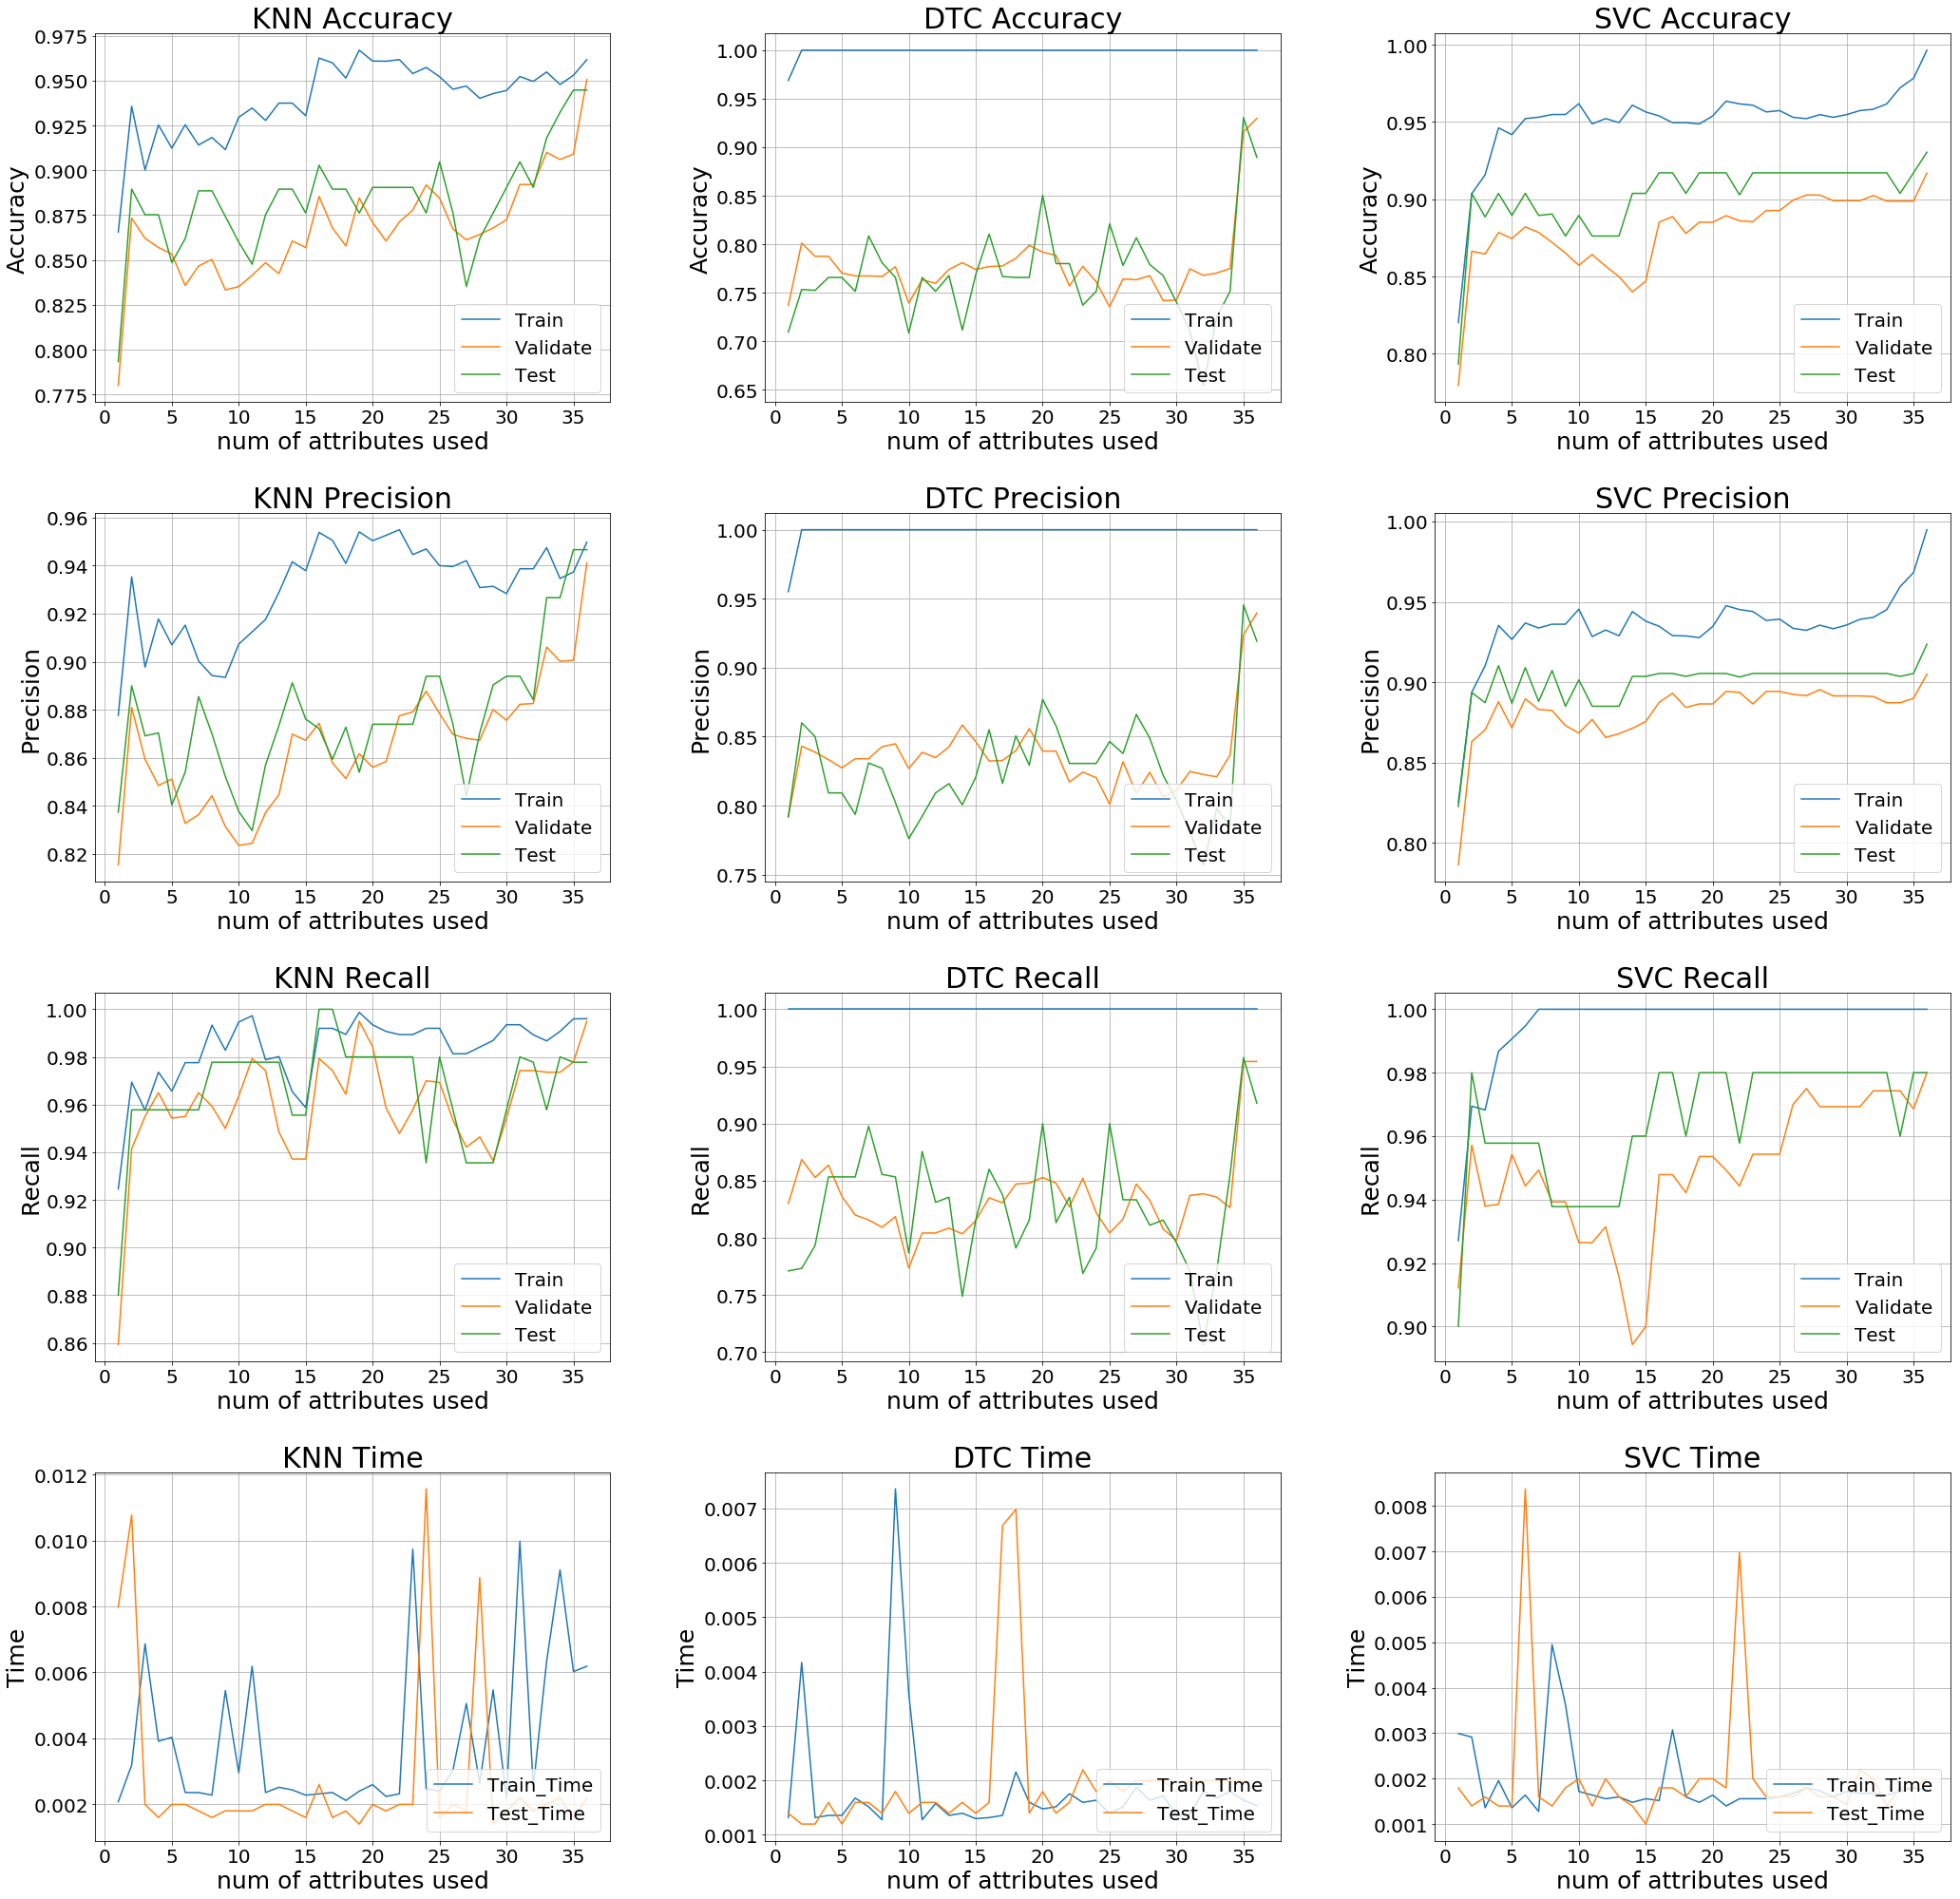

In [42]:
plotModel2(rbestmyKNN,rbestmyDTC,rbestmySVC,(35,35),0.3,0.3,20)

In [43]:
printTotalBestResult(rbestmyKNN,rbestmyDTC,rbestmySVC)

KNN
- Max Accuracy:   0.9447619047619048 using: 35 attributes.
- Max Precission: 0.9466666666666667 using: 35 attributes.
- Max Recall:     1.0 using: 16 attributes.

DTC
- Max Accuracy:   0.9304761904761906 using: 35 attributes.
- Max Precission: 0.9454545454545455 using: 35 attributes.
- Max Recall:     0.9577777777777777 using: 35 attributes.

SVC
- Max Accuracy:   0.9304761904761906 using: 36 attributes.
- Max Precission: 0.9236363636363636 using: 36 attributes.
- Max Recall:     0.9800000000000001 using: 2 attributes.
